## Load and prepare datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.preprocessing import normalize 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the datasets back from CSV files

period_names = ['1970-1979', '1980-1989', '1990-1999', '2000-2009', '2010-2020']
loaded_datasets = {}

for period_name in period_names:
    loaded_datasets[period_name] = pd.read_csv(f"datasets/climate_features_{period_name}_v2.csv")
    print(f"Loaded climate_features_{period_name}_v2.csv with shape {loaded_datasets[period_name].shape}")

Loaded climate_features_1970-1979_v2.csv with shape (56, 27)
Loaded climate_features_1980-1989_v2.csv with shape (56, 27)
Loaded climate_features_1990-1999_v2.csv with shape (56, 27)
Loaded climate_features_2000-2009_v2.csv with shape (56, 27)
Loaded climate_features_2010-2020_v2.csv with shape (56, 27)


In [3]:
def get_metadata(df):
    return df[['city', 'latitude', 'longitude']]

def get_climate_features(df):
    return df.drop(columns=['city', 'latitude', 'longitude'])

In [4]:
# old code for normalization
# ds_70_norm =  normalize(ds_70, axis=0)

In [5]:
datasets = {}

for period_name in period_names:
    datasets[period_name] = get_climate_features(loaded_datasets[period_name])

In [6]:
display(datasets['1970-1979'].head())

,sf_winter,sf_spring,sf_summer,sf_autumn,t2m_winter,t2m_spring,t2m_summer,t2m_autumn,max_t2m_winter,min_t2m_winter,...,max_t2m_autumn,min_t2m_autumn,tp_winter,tp_spring,tp_summer,tp_autumn,si10_winter,si10_spring,si10_summer,si10_autumn
0,0.000007,0.0,0.0,4.273874e-07,284.63730,289.86414,299.29807,293.68760,286.43805,282.32504,...,298.53958,287.43155,0.002256,0.000734,0.000099,0.001925,3.547455,3.304141,3.209727,2.860397
1,0.000007,0.0,0.0,4.273874e-07,284.63730,289.86414,299.29807,293.68760,286.43805,282.32504,...,298.53958,287.43155,0.002256,0.000734,0.000099,0.001925,3.547455,3.304141,3.209727,2.860397
2,0.000000,0.0,0.0,0.000000e+00,287.42725,288.70905,296.62704,293.71564,289.16937,286.02795,...,297.83255,289.29710,0.002026,0.000443,0.000396,0.002096,7.276319,6.545586,4.539440,5.777602
3,0.000004,0.0,0.0,3.018202e-06,285.85037,287.65790,294.54218,291.21277,287.70624,284.41626,...,295.31370,286.79352,0.002973,0.001518,0.000422,0.003120,5.231414,5.068507,4.403036,4.809238
4,0.000060,0.0,0.0,1.512280e-05,282.98540,288.42660,298.35940,291.01584,285.79370,281.02234,...,297.09576,285.39996,0.002020,0.000799,0.000413,0.001674,3.335901,2.865670,2.892831,3.145828


## Features variance

In [7]:
def calculate_feature_statistics(df):
    stats = {}
    for column in df.columns:
        stats[column] = {
            'mean': df[column].mean(),
            'median': df[column].median(),
            'std_dev': df[column].std(),
            'min': df[column].min(),
            'max': df[column].max(),
            'variance': df[column].var()
        }
    result = pd.DataFrame(stats).T
    
    # Formater toutes les colonnes numériques
    return result.style.format('{:.10f}')

In [8]:
calculate_feature_statistics(datasets['1970-1979'])

,mean,median,std_dev,min,max,variance
sf_winter,0.0007162462,0.0006714070,0.0006069884,0.0000000000,0.0028910637,0.0000003684
sf_spring,0.0001225501,0.0000424663,0.0002230236,0.0000000000,0.0012754440,0.0000000497
sf_summer,0.0000056001,0.0000000000,0.0000205713,0.0000000000,0.0001439713,0.0000000004
sf_autumn,0.0004095682,0.0002743191,0.0004333264,0.0000000000,0.0021953795,0.0000001878
t2m_winter,275.2516360714,274.0536900000,5.2109576207,264.7636000000,287.4272500000,27.1540793244
t2m_spring,281.9198573214,281.8098350000,3.5478249036,275.6444400000,289.8641400000,12.5870615464
t2m_summer,291.0876982143,290.5530400000,3.4991743445,282.1815200000,299.2980700000,12.2442210929
t2m_autumn,283.6139189286,282.9598250000,4.0680826997,276.4150400000,293.7156400000,16.5492968517
max_t2m_winter,279.1229544643,278.5859850000,4.1147473340,271.5234400000,289.1693700000,16.9311456225
min_t2m_winter,270.8398782143,269.7957000000,6.8572341597,257.0914000000,286.0279500000,47.0216603203


## Remove highly correlated features

In [9]:
def display_correlation_matrix(df):
    display(df.corr())

In [10]:
display_correlation_matrix(datasets['1970-1979'])

,sf_winter,sf_spring,sf_summer,sf_autumn,t2m_winter,t2m_spring,t2m_summer,t2m_autumn,max_t2m_winter,min_t2m_winter,...,max_t2m_autumn,min_t2m_autumn,tp_winter,tp_spring,tp_summer,tp_autumn,si10_winter,si10_spring,si10_summer,si10_autumn
sf_winter,1.000000,0.834334,0.679395,0.954415,-0.724092,-0.673718,-0.480118,-0.713965,-0.769044,-0.655930,...,-0.555179,-0.731710,0.148273,0.714144,0.782416,0.225257,-0.406170,-0.455415,-0.452204,-0.355170
sf_spring,0.834334,1.000000,0.899422,0.842819,-0.402632,-0.502344,-0.429693,-0.462673,-0.482633,-0.328946,...,-0.417587,-0.441654,0.254541,0.675969,0.700386,0.246994,-0.315040,-0.353354,-0.357654,-0.299754
sf_summer,0.679395,0.899422,1.000000,0.723994,-0.213017,-0.291823,-0.289010,-0.277208,-0.290368,-0.148667,...,-0.254063,-0.233692,0.317958,0.616389,0.640392,0.296949,-0.258992,-0.289380,-0.305951,-0.264344
sf_autumn,0.954415,0.842819,0.723994,1.000000,-0.702316,-0.660858,-0.479803,-0.698220,-0.739498,-0.640106,...,-0.567006,-0.702794,0.111140,0.621323,0.742579,0.207893,-0.341543,-0.389719,-0.384670,-0.297474
t2m_winter,-0.724092,-0.402632,-0.213017,-0.702316,1.000000,0.792627,0.494348,0.914687,0.982131,0.984069,...,0.665672,0.967398,0.377709,-0.397712,-0.598776,0.209151,0.294087,0.342817,0.309700,0.199279
t2m_spring,-0.673718,-0.502344,-0.291823,-0.660858,0.792627,1.000000,0.870131,0.927461,0.803383,0.786117,...,0.927613,0.803390,0.136228,-0.306660,-0.651824,-0.053566,-0.142069,-0.085700,-0.103849,-0.234316
t2m_summer,-0.480118,-0.429693,-0.289010,-0.479803,0.494348,0.870131,1.000000,0.779266,0.533806,0.477412,...,0.958900,0.563109,-0.095032,-0.299186,-0.589005,-0.230121,-0.388751,-0.349843,-0.337158,-0.439531
t2m_autumn,-0.713965,-0.462673,-0.277208,-0.698220,0.914687,0.927461,0.779266,1.000000,0.919367,0.890686,...,0.890493,0.943534,0.212153,-0.433772,-0.707323,0.037348,0.082164,0.131454,0.120042,-0.007316
max_t2m_winter,-0.769044,-0.482633,-0.290368,-0.739498,0.982131,0.803383,0.533806,0.919367,1.000000,0.959521,...,0.687088,0.959778,0.285066,-0.481688,-0.654832,0.138416,0.308102,0.361298,0.336412,0.222758
min_t2m_winter,-0.655930,-0.328946,-0.148667,-0.640106,0.984069,0.786117,0.477412,0.890686,0.959521,1.000000,...,0.655255,0.931507,0.439629,-0.294263,-0.527547,0.264118,0.234456,0.279099,0.236397,0.136580


In [11]:
def remove_highly_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    reduced_df = df.drop(columns=to_drop)

    print(f"Removed {len(to_drop)} features due to high correlation (> {threshold})")
    print("Features removed:", to_drop)
    print("Features retained:", reduced_df.columns.tolist())
    print("New shape of the dataset:", reduced_df.shape)

    plt.figure(figsize=(7,3))
    sns.heatmap(reduced_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Correlation Matrix after Removing Highly Correlated Features")
    plt.show()

    return reduced_df

def retrieve_low_correlation_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_keep = [column for column in upper_triangle.columns if upper_triangle[column].dropna().le(threshold).all()]

    print(f"Retained {len(to_keep)} features with low correlation (<= {threshold})")
    print("Features retained:", to_keep)

    if len(to_keep) > 0:
        print("Number of features retained:", len(to_keep))
    else:
        print("No features found with all correlations <= threshold.")

    return to_keep

def remove_features_from_df(df, features_to_keep):
    reduced_df = df[features_to_keep]
    print("New shape of the dataset after removing features:", reduced_df.shape)
    return reduced_df  

    
    

In [12]:
# Put each dataset under each other
fused_ds = pd.DataFrame()

for period_name in period_names:
    fused_ds = pd.concat([fused_ds, datasets[period_name]], ignore_index=True)

display(fused_ds.shape)

(280, 24)

In [13]:
low_correlation_features = retrieve_low_correlation_features(fused_ds, threshold=0.8)
low_correlation_features

Retained 7 features with low correlation (<= 0.8)
Features retained: ['sf_winter', 't2m_winter', 't2m_spring', 'tp_winter', 'tp_spring', 'tp_summer', 'si10_winter']
Number of features retained: 7


['sf_winter',
 't2m_winter',
 't2m_spring',
 'tp_winter',
 'tp_spring',
 'tp_summer',
 'si10_winter']

In [14]:
reduced_ds = {}

for period_name in period_names:
    print(f"Processing period: {period_name}")
    reduced_ds[period_name] = remove_features_from_df(datasets[period_name], low_correlation_features)

Processing period: 1970-1979
New shape of the dataset after removing features: (56, 7)
Processing period: 1980-1989
New shape of the dataset after removing features: (56, 7)
Processing period: 1990-1999
New shape of the dataset after removing features: (56, 7)
Processing period: 2000-2009
New shape of the dataset after removing features: (56, 7)
Processing period: 2010-2020
New shape of the dataset after removing features: (56, 7)


In [15]:
reduced_70 = reduced_ds['1970-1979']
reduced_70.head()

,sf_winter,t2m_winter,t2m_spring,tp_winter,tp_spring,tp_summer,si10_winter
0,0.000007,284.63730,289.86414,0.002256,0.000734,0.000099,3.547455
1,0.000007,284.63730,289.86414,0.002256,0.000734,0.000099,3.547455
2,0.000000,287.42725,288.70905,0.002026,0.000443,0.000396,7.276319
3,0.000004,285.85037,287.65790,0.002973,0.001518,0.000422,5.231414
4,0.000060,282.98540,288.42660,0.002020,0.000799,0.000413,3.335901


In [16]:
fused_ds_reduced = remove_features_from_df(fused_ds, low_correlation_features)

New shape of the dataset after removing features: (280, 7)


## PCA

In [17]:
import numpy as np
from matplotlib import pyplot as pl
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [18]:
def compute_pca(df):
    # Normalize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)

    # Apply PCA
    pca = PCA(n_components=df.shape[1])
    pca.fit(scaled_data)
    return pca, scaled_data

def display_pca_variance(pca):
    pl.figure(figsize=(8,3))
    pl.subplot(1,2,1)
    pl.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    pl.ylim(0.0, 0.4)
    pl.title('Explained variance')
    pl.xlabel('Index of eigenvector')
    pl.ylabel('Explained variance')
    pl.grid()
    pl.subplot(1,2,2)
    pl.bar(np.arange(len(pca.explained_variance_ratio_)), 100*np.cumsum(pca.explained_variance_ratio_))
    pl.ylim(0.0, 100)
    pl.title('Percent of explained variance')
    pl.xlabel('Index of eigenvector')
    pl.ylabel('Explained variance [%]')
    pl.grid()
    pl.tight_layout()

In [19]:
pcas = {}
scaled_ds = {}

for period_name in period_names:
    pca, scaled_data = compute_pca(reduced_ds[period_name])
    pcas[period_name] = pca
    scaled_ds[period_name] = scaled_data

PCA Explained Variance for period: 1970-1979
PCA Explained Variance for period: 1980-1989
PCA Explained Variance for period: 1990-1999
PCA Explained Variance for period: 2000-2009
PCA Explained Variance for period: 2010-2020


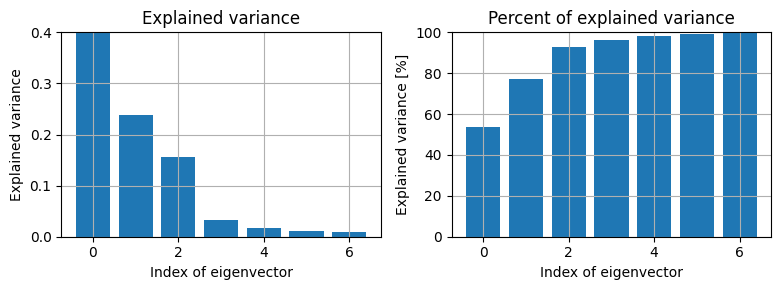

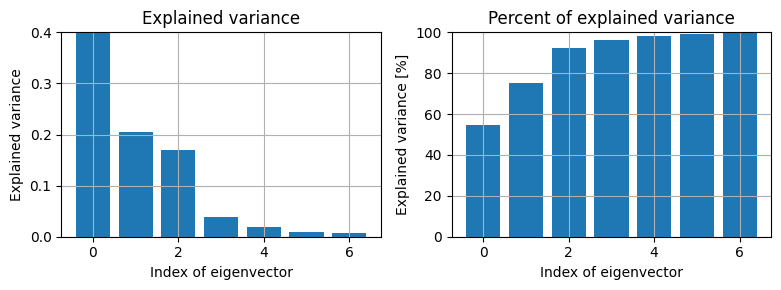

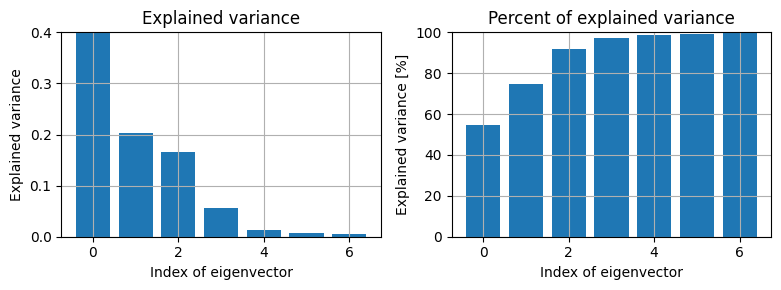

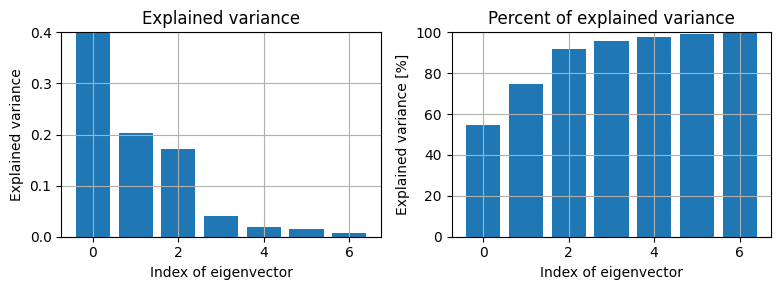

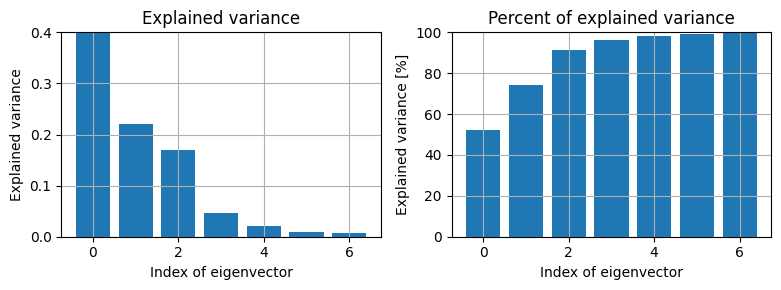

In [20]:
for period_name in period_names:
    print(f"PCA Explained Variance for period: {period_name}")
    display_pca_variance(pcas[period_name])

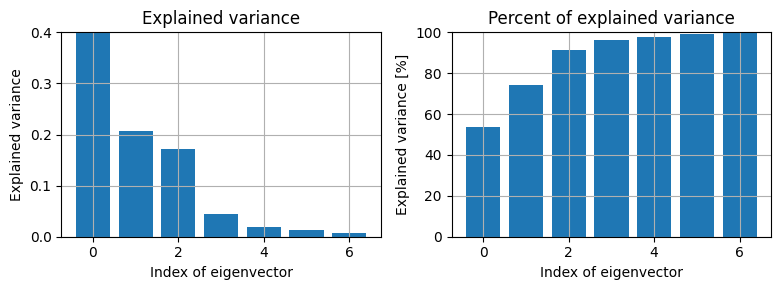

In [21]:
# global PCA
fused_pca, fused_scaled_data = compute_pca(fused_ds_reduced)
display_pca_variance(fused_pca)

In [22]:
pca_70 = pcas['1970-1979']
scaled_70 = scaled_ds['1970-1979']

n_components_to_show = 3

loadings = pd.DataFrame(
    pca_70.components_[:n_components_to_show],
    columns=reduced_70.columns,
    index=[f'PC{i+1}' for i in range(n_components_to_show)]
)

print("Loadings des composantes principales:")
display(loadings)

Loadings des composantes principales:


,sf_winter,t2m_winter,t2m_spring,tp_winter,tp_spring,tp_summer,si10_winter
PC1,0.482097,-0.413405,-0.380085,0.074390,0.422324,0.466797,-0.224552
PC2,-0.000753,0.405726,0.409014,0.644901,0.395036,0.090261,-0.296641
PC3,-0.005688,0.176263,-0.343448,0.461032,-0.056417,0.227364,0.763881


In [23]:
def find_nb_min_components_for_variance(pca, target_explained_variance=0.9):
    cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
    min_index = np.sum(cummulated_variance < target_explained_variance)

    return min_index + 1

def project_data_pca(df_scaled, pca, n_components, target_explained_variance=0.9):
    cummulated_variance = np.cumsum(pca.explained_variance_ratio_)
    min_index = n_components - 1

    print('The projection will try to keep', target_explained_variance*100, '% of the variance')
    print(min_index + 1, 'eigenvectors are needed')
    print('Keeping', cummulated_variance[min_index]*100, '% of the variance')

    projected = PCA(n_components = min_index+1).fit_transform(df_scaled)

    return projected

def add_metadata_to_df(df, metadata):
    return pd.concat([metadata, df], axis=1)

In [24]:
min_nb_components = find_nb_min_components_for_variance(fused_pca, target_explained_variance=0.9)
projected_ds = {}

for period_name in period_names:
    print(f"Projecting data for period: {period_name}")
    projected_ds[period_name] = project_data_pca(scaled_ds[period_name], pcas[period_name], min_nb_components, target_explained_variance=0.9)
    print("\n")


Projecting data for period: 1970-1979
The projection will try to keep 90.0 % of the variance
3 eigenvectors are needed
Keeping 92.98470374347062 % of the variance


Projecting data for period: 1980-1989
The projection will try to keep 90.0 % of the variance
3 eigenvectors are needed
Keeping 92.41144775903865 % of the variance


Projecting data for period: 1990-1999
The projection will try to keep 90.0 % of the variance
3 eigenvectors are needed
Keeping 91.63313281871518 % of the variance


Projecting data for period: 2000-2009
The projection will try to keep 90.0 % of the variance
3 eigenvectors are needed
Keeping 91.78467583571842 % of the variance


Projecting data for period: 2010-2020
The projection will try to keep 90.0 % of the variance
3 eigenvectors are needed
Keeping 91.44183619313009 % of the variance




In [25]:
metadata = get_metadata(loaded_datasets['1970-1979'])
final_ds = {}

for period_name in period_names:
    final_ds[period_name] = add_metadata_to_df(
        pd.DataFrame(projected_ds[period_name]),
        metadata
    )
    print(f"Final dataset for period {period_name} has shape: {final_ds[period_name].shape}")

Final dataset for period 1970-1979 has shape: (56, 6)
Final dataset for period 1980-1989 has shape: (56, 6)
Final dataset for period 1990-1999 has shape: (56, 6)
Final dataset for period 2000-2009 has shape: (56, 6)
Final dataset for period 2010-2020 has shape: (56, 6)


In [26]:
final_70 = final_ds['1970-1979']
final_70.head()

,city,latitude,longitude,0,1,2
0,Nicosia,35.25,33.25,-3.765352,0.873884,-1.013947
1,North Nicosia,35.25,33.25,-3.765352,0.873884,-1.013947
2,Valletta,36.00,14.50,-4.307986,0.156094,0.648226
3,Gibraltar,36.25,-5.25,-3.312612,1.225076,0.257683
4,Athens,38.00,23.75,-3.263791,0.512743,-1.056404


In [27]:
for period_name in period_names:
    display(final_ds[period_name].head())

,city,latitude,longitude,0,1,2
0,Nicosia,35.25,33.25,-3.765352,0.873884,-1.013947
1,North Nicosia,35.25,33.25,-3.765352,0.873884,-1.013947
2,Valletta,36.00,14.50,-4.307986,0.156094,0.648226
3,Gibraltar,36.25,-5.25,-3.312612,1.225076,0.257683
4,Athens,38.00,23.75,-3.263791,0.512743,-1.056404


,city,latitude,longitude,0,1,2
0,Nicosia,35.25,33.25,-3.824955,0.979319,-0.588661
1,North Nicosia,35.25,33.25,-3.824955,0.979319,-0.588661
2,Valletta,36.00,14.50,-4.230570,-0.117181,0.895059
3,Gibraltar,36.25,-5.25,-3.476565,0.984462,0.406561
4,Athens,38.00,23.75,-3.364863,0.594634,-0.787282


,city,latitude,longitude,0,1,2
0,Nicosia,35.25,33.25,-3.811785,-0.183942,1.066233
1,North Nicosia,35.25,33.25,-3.811785,-0.183942,1.066233
2,Valletta,36.00,14.50,-4.203040,1.013278,-0.055451
3,Gibraltar,36.25,-5.25,-3.361576,1.196918,1.154215
4,Athens,38.00,23.75,-3.358583,-0.373333,0.637862


,city,latitude,longitude,0,1,2
0,Nicosia,35.25,33.25,-3.800910,0.978000,-0.973611
1,North Nicosia,35.25,33.25,-3.800910,0.978000,-0.973611
2,Valletta,36.00,14.50,-4.280019,0.412230,0.795699
3,Gibraltar,36.25,-5.25,-3.299445,1.284451,0.193099
4,Athens,38.00,23.75,-3.200399,0.459472,-0.961817


,city,latitude,longitude,0,1,2
0,Nicosia,35.25,33.25,-3.765621,1.287562,-0.736092
1,North Nicosia,35.25,33.25,-3.765621,1.287562,-0.736092
2,Valletta,36.00,14.50,-4.345442,-0.077628,0.683922
3,Gibraltar,36.25,-5.25,-3.358415,1.073909,0.414488
4,Athens,38.00,23.75,-3.180946,0.830382,-0.794431


## Find closest city

In [89]:
from sklearn.metrics.pairwise import euclidean_distances
from scipy.spatial.distance import mahalanobis
from scipy.stats import wasserstein_distance

In [110]:
def get_distance_matrix(ds_current, ds_target, distance_metric='euclidean'):
    
    distances = [[0 for _ in range(ds_target.shape[0])] for _ in range(ds_current.shape[0])]

    for i in range(ds_current.shape[0]):
        for j in range(ds_target.shape[0]):
            if distance_metric == 'euclidean':
                distances[i][j] = euclidean_distances([ds_current.iloc[i, 3:]], [ds_target.iloc[j, 3:]])[0][0]
            elif distance_metric == 'mahalanobis':
                VI = np.linalg.inv(np.cov(ds_target.iloc[:, 3:].T))
                distances[i][j] = mahalanobis(ds_current.iloc[i, 3:], ds_target.iloc[j, 3:], VI)           
            else:
                raise ValueError("Unsupported distance metric. Use 'euclidean' or 'mahalanobis'.")
    
    return distances

In [111]:
def compute_distance_threshold(distance_matrix, percentile=0.9):
    """
    Compute a global distance threshold from the upper triangular
    part (diagonal included) of a distance matrix.
    """
    # indices de la matrice triangulaire supérieure (diagonale comprise)
    triu_idx = np.triu_indices(distance_matrix.shape[0], k=0)
    
    distances = distance_matrix[triu_idx]
    
    return np.quantile(distances, percentile)

In [112]:
def find_closest_city(
    target_ds,
    current_ds,
    current_city,
    distance_matrix,
    threshold=0.9
):
    """
    Find the closest city in target_ds for a given city in current_ds.
    If the closest distance is above the threshold, return 'New Climate'.
    """
    # Find the index of the current city in current_ds
    mask = (
        (current_ds['latitude'] == current_city[0]) &
        (current_ds['longitude'] == current_city[1])
    )
    
    if not mask.any():
        raise ValueError(
            f"City at coordinates {current_city} not found in the current dataset."
        )
    
    current_index = current_ds[mask].index[0]
    
    # Closest city
    distances = distance_matrix[current_index]
    closest_index = np.argmin(distances)
    closest_distance = distances[closest_index]
    
    # Novel climate criterion
    if closest_distance > threshold:
        return "New Climate", closest_distance
    
    closest_city = target_ds.iloc[closest_index]['city']
    return closest_city, closest_distance


In [113]:
bern = (47, 7.5)

In [119]:
euclidean_distances_matrix = get_distance_matrix(final_ds['1970-1979'], final_ds['2010-2020'], distance_metric='euclidean')
find_closest_city(final_ds['1970-1979'], final_ds['2010-2020'], bern, euclidean_distances_matrix)

('Bern', 0.28497396133203895)

In [120]:
metadata = get_metadata(loaded_datasets['2010-2020'])
names = loaded_datasets['2010-2020'][['city']]
cities = pd.DataFrame(columns=['city_2010', 'city_1970'])

distances = []

for city, lat, long in metadata.values:
    closest_city = find_closest_city(final_ds['1970-1979'], final_ds['2010-2020'], (lat, long), euclidean_distances_matrix)
    new_row = pd.DataFrame([[city, closest_city[0]]], 
                          columns=['city_2010', 'city_1970'])
    cities = pd.concat([cities, new_row], ignore_index=True)

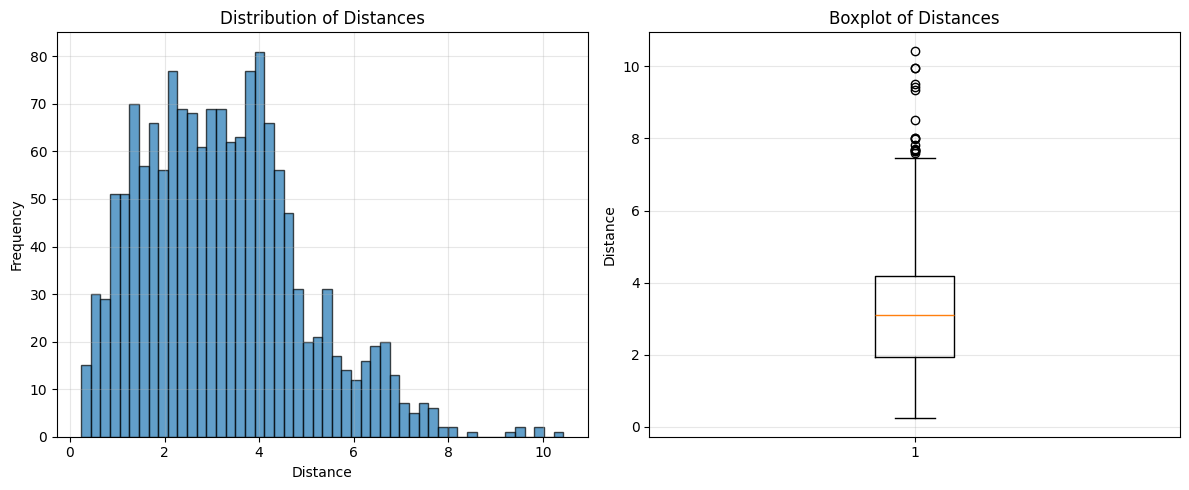

Total distances calculated: 1540
Mean distance: 3.2265
Median distance: 3.0942
Std deviation: 1.6817
Min distance: 0.2339
Max distance: 10.4351


In [121]:
# Extract unique distances from upper triangle of the distance matrix (excluding diagonal)
distances_array = np.array(euclidean_distances_matrix)
distances = distances_array[np.triu_indices_from(distances_array, k=1)]

# Plot distribution of distances
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(distances, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(distances)
plt.ylabel('Distance')
plt.title('Boxplot of Distances')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total distances calculated: {len(distances)}")
print(f"Mean distance: {np.mean(distances):.4f}")
print(f"Median distance: {np.median(distances):.4f}")
print(f"Std deviation: {np.std(distances):.4f}")
print(f"Min distance: {np.min(distances):.4f}")
print(f"Max distance: {np.max(distances):.4f}")


In [122]:
display(cities)

,city_2010,city_1970
0,Nicosia,North Nicosia
1,North Nicosia,North Nicosia
2,Valletta,Valletta
3,Gibraltar,Gibraltar
4,Athens,Athens
5,Lisbon,Gibraltar
6,Ankara,Ankara
7,Yerevan,Yerevan
8,Madrid,Madrid
9,Tirana,Tirana


In [123]:
# calculate the percentage of cities that remained the same
same_city_count = np.sum(cities['city_2010'] == cities['city_1970'])
total_cities = len(cities)

f"Percentage of cities that remained the same: {same_city_count / total_cities * 100:.2f}%"

'Percentage of cities that remained the same: 67.86%'